## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [17]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

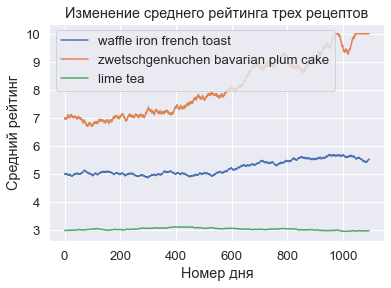

In [18]:
# Загрузка данных из файла average_ratings.npy
data = np.load('average_ratings.npy')

# Задание названий рецептов и их индексов в массиве
recipes = {0: 'waffle iron french toast',
           1: 'zwetschgenkuchen bavarian plum cake',
           2: 'lime tea'}

# Создание графика
fig, ax = plt.subplots()

# Отображение временных рядов
for i in range(data.shape[0]):
    ax.plot(data[i], label=recipes[i])

# Добавление подписей осей и заголовка графика
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
ax.legend()

# Отображение графика
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


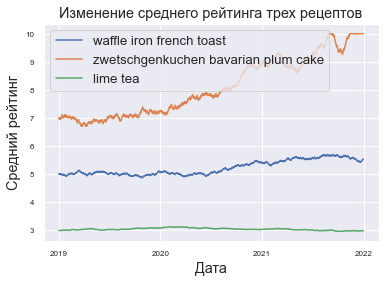

In [19]:
# Загрузка данных из файла average_ratings.npy
data = np.load('average_ratings.npy')

# Задание названий рецептов и их индексов в массиве
recipes = {0: 'waffle iron french toast',
           1: 'zwetschgenkuchen bavarian plum cake',
           2: 'lime tea'}

# Создание графика
fig, ax = plt.subplots()

# Создание диапазона дат
date_range = pd.date_range('2019-01-01', '2021-12-30', freq='D')
years = mdates.YearLocator()
months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter('%Y')

# Отображение временных рядов
for i in range(data.shape[0]):
    ax.plot(date_range, data[i], label=recipes[i])

# Добавление подписей осей и заголовка графика
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

# Настройка масштабирования графика
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.xaxis.set_minor_locator(plt.MaxNLocator(24))
ax.tick_params(axis='both', which='major', labelsize=8)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_fmt)

# Добавление легенды
ax.legend()

# Отображение графика
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

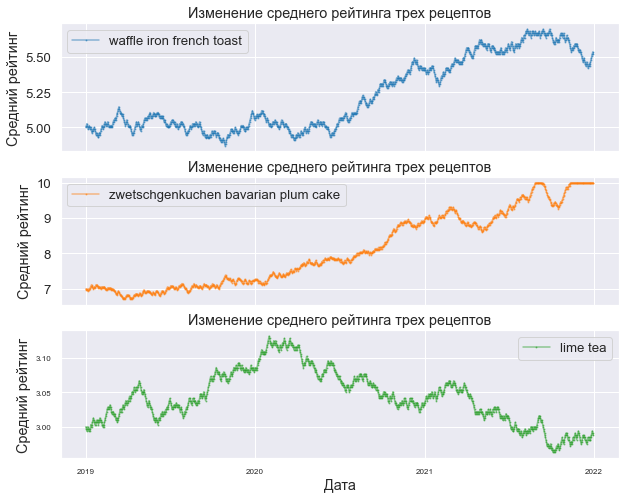

In [20]:
# Создание фигуры
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Добавление данных на каждый из графиков
ax1.plot(date_range, data[0], color='#1F77B4', marker='o', markersize=1, label=recipes[0], alpha=0.5)
ax2.plot(date_range, data[1], color='#FF7F0F', marker='o', markersize=1, label=recipes[1], alpha=0.5)
ax3.plot(date_range, data[2], color='#2CA02C', marker='o', markersize=1, label=recipes[2], alpha=0.5)

years = mdates.YearLocator()
months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter('%Y')

# Настройка масштабирования для общей оси `x`
ax3.xaxis.set_major_locator(plt.MaxNLocator(6))
ax3.xaxis.set_minor_locator(plt.MaxNLocator(24))
ax3.tick_params(axis='both', which='major', labelsize=8)

# Добавление подписей осей
ax1.set_ylabel('Средний рейтинг')
ax2.set_ylabel('Средний рейтинг')
ax3.set_ylabel('Средний рейтинг')
ax3.set_xlabel('Дата')

# Добавление заголовка на верхний график
ax1.set_title('Изменение среднего рейтинга трех рецептов')
ax2.set_title('Изменение среднего рейтинга трех рецептов')
ax3.set_title('Изменение среднего рейтинга трех рецептов')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

# Добавление легенд
ax1.legend(['waffle iron french toast'])
ax2.legend(['zwetschgenkuchen bavarian plum cake'])
ax3.legend(['lime tea'])


# Отображение графика
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


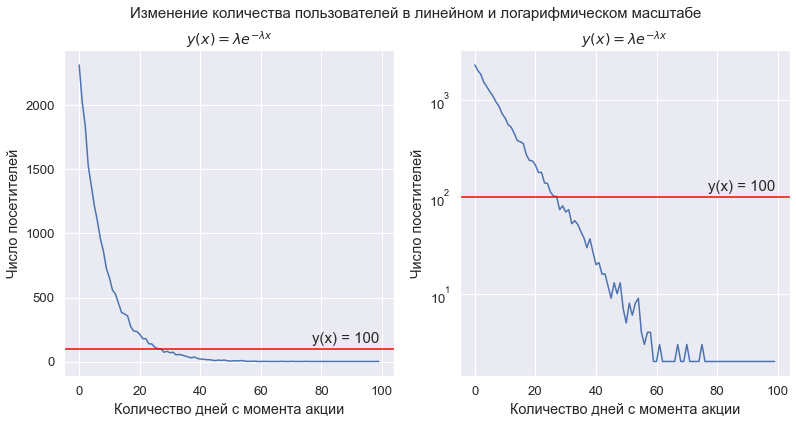

In [21]:
visitors = np.load('visitors.npy')
fig, ax = plt.subplots(1,2, figsize=(13,6))
for i in range(2):
    if i == 0:
        ax[i].plot(visitors) # линейный график 
        ax[i].set_title('$y(x)=\lambda e^{-\lambda x}$')
        ax[i].set_xlabel('Количество дней с момента акции')
        ax[i].set_ylabel('Число посетителей')
        ax[i].axhline(100, color='red')
        ax[i].text(77, 150, r'y(x) = 100', fontsize=15)
    else:
        ax[i].plot(visitors) # логарифмический график
        ax[i].set_title('$y(x)=\lambda e^{-\lambda x}$')
        ax[i].set_xlabel('Количество дней с момента акции')
        ax[i].set_ylabel('Число посетителей')
        ax[i].set_yscale('log')
        ax[i].axhline(100, color='red')
        ax[i].text(77, 115, r'y(x) = 100', fontsize=15)
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=15)
plt.show(block=False)

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

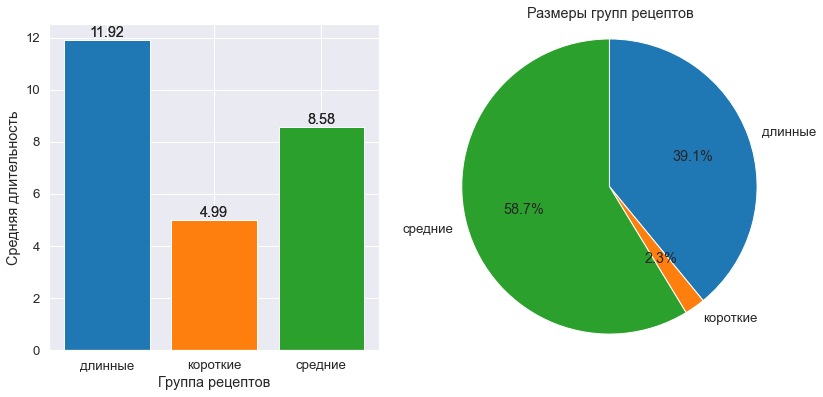

In [22]:
# загрузить файл
recipes = pd.read_csv("recipes_sample.csv")

# создать новый столбец "recipe_length" со значениями 'короткие', 'средние' или 'длинные'
conditions = [
    recipes['minutes'] < 5,
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    recipes['minutes'] >= 50
]
values = ['короткие', 'средние', 'длинные']
recipes['recipe_length'] = pd.Series(np.select(conditions, values))

# сгруппировать рецепты по длине и посчитать среднее число шагов и количество рецептов в каждой группе
grouped = recipes.groupby('recipe_length').agg({'n_steps': 'mean', 'name': 'count'}).reset_index()
grouped = grouped.rename(columns={'n_steps': 'mean_steps', 'name': 'recipe_count'})

# построить столбчатую диаграмму
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 6))
bars = ax1.bar(grouped['recipe_length'], grouped['mean_steps'], color=colors)
ax1.bar(grouped['recipe_length'], grouped['mean_steps'], color=colors)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

# добавить значения к столбцам
for i in ax1.patches:
    ax1.annotate(str(round(i.get_height(), 2)), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# построить круговую диаграмму
sizes = grouped['recipe_count']
ax2.pie(sizes, labels=grouped['recipe_length'], colors =  colors, autopct='%1.1f%%', startangle=90, counterclock=False)
ax2.axis('equal')
ax2.set_title('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

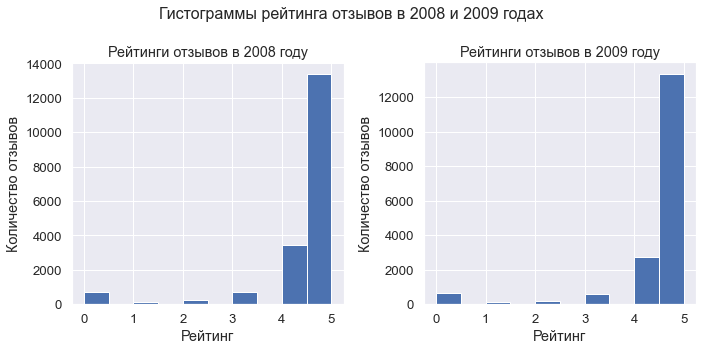

In [23]:
# чтение файла и создание DataFrame
df = pd.read_csv('reviews_sample.csv')

# преобразование столбца date к типу datetime
df['date'] = pd.to_datetime(df['date'])

# создание фильтров для отбора отзывов за 2008 и 2009 годы
mask_2008 = (df['date'].dt.year == 2008)
mask_2009 = (df['date'].dt.year == 2009)

# отбор отзывов за 2008 и 2009 годы
df_2008 = df.loc[mask_2008]
df_2009 = df.loc[mask_2009]

# построение гистограмм рейтингов для 2008 и 2009 годов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

df_2008['rating'].plot.hist(ax=ax1)
ax1.set_title('Рейтинги отзывов в 2008 году')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Количество отзывов')

df_2009['rating'].plot.hist(ax=ax2)
ax2.set_title('Рейтинги отзывов в 2009 году')
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Количество отзывов')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=16)
plt.tight_layout()
plt.show()

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

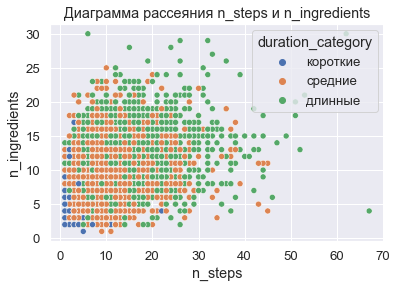

In [24]:
# Добавление нового столбца с категориальной длительностью рецепта
bins = [0, 5, 50, float('inf')]
labels = ['короткие', 'средние', 'длинные']
recipes['duration_category'] = pd.cut(recipes['minutes'], bins=bins, labels=labels)

# Построение диаграммы рассеяния
sns.scatterplot(x='n_steps', y='n_ingredients', hue='duration_category', data=recipes)

# Добавление заголовка
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

Нет, линейная зависимость визуально не наблюдается. Но короткие рецепты имеют небольшое количество шагов и ингредиентов, а долгие репепты наоборот

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

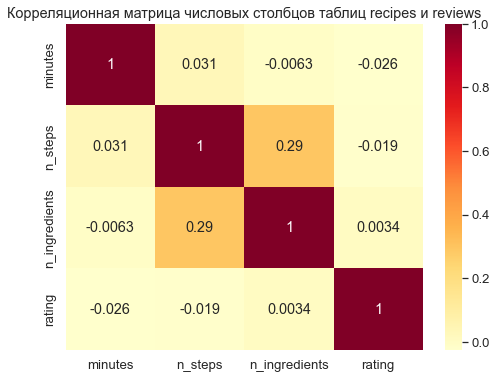

In [25]:
recipes = pd.read_csv("recipes_sample.csv")
reviews = pd.read_csv("reviews_sample.csv")

# объединение таблиц
merged_df = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# выбор нужных столбцов
cols = ['minutes', 'n_steps', 'n_ingredients', 'rating']
corr = merged_df[cols].corr()

# построение тепловой карты
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()